# Kelompok 8 - Final Project 2

**Anggota:**\
**1. Yona Ade Hendrawan - PYTN_KS09_008**\
**2. Rizke Fridayati - PYTN_KS09_018**\
**3. Putri Altika Sari - PYTN_KS09_020**

# Introduction

Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

## Tentang Dataset

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. 

## Informasi Atribut

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu 
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari 
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu 
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu 
10. WindDir9am - arah angin jam 9 pagi 
11. WindDir3pm - arah angin jam 3 sore 
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen 
15. Humidity3pm - humiditas jam 3 sore dalam persen 
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa 
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa 
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan. 
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore 
20. Temp9am - temperatur jam 9 pagi dalam celcius 
21. Temp3pm - temperatur jam 3 sore dalam celcius 
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0 
23. RainTomorrow - variable yang mau di prediksi

## Objektif

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:\
● Mampu memahami konsep Classiﬁcation dengan Logistic Regression dan SVM\
● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM\
● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# Import Libraries

cell pertama pada notebook hanya berisi semua library yang digunakan dalam project.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import pydotplus
import matplotlib.pyplot as plt
import pickle
import joblib
%matplotlib inline

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Loading

bagian ini berisi proses data loading.

In [2]:
#data loading

df = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#melihat dimensi data

df.shape

(145460, 23)

dari output diatas, terlihat bahwa data ini berjumlah 145.460 baris dan 23 kolom. lalu, akan dilanjutkan ke tahap data cleaning.

# Data Cleaning

bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [4]:
#melihat tipe data pada kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

dari output diatas, terlihat bahwa tipe data pada kolom sudah sesuai. selanjutnya akan mengecek missing value.

In [5]:
#cek missing value

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

dari output diatas, terlihat bahwa hampir semua kolom memiliki missing value sangat banyak kecuali kolom "Date" dan "Location" maka akan dilakukan pengelompokan data categorical dan numerical agar memudahkan dalam pengisian nilai missing value.

In [6]:
#proses pengelompokan data categorical dan numerical

categorical=[]
numerical=[]

for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)


        
#melihat data yang sudah dikelompokkan

print("Variabel Categorical:", categorical)
print("Variabel Numerical:", numerical)

Variabel Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Variabel Numerical: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


setelah dilakukan proses pengelompokkan variabel categorical dan numerical, selanjutnya akan dilakukan handling missing value dengan cara mengisi nilai modus pada variabel categoricale kecuali variabel "Location" dan "Date" karena tidak memiliki missing value.

In [7]:
#handling missing value pada variabel categorical dengan nilai modus

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

setelah dilakukan handling missing value pada variabel categorical dengan nilai modus, maka selanjutnya akan handling missing value pada variabel numerical dengan mengisi nilai median.

In [8]:
#mengisi nilai median pada variabel numerical

for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

setelah dilakukan handling missing value pada variabel numerical, maka selanjutnya akan mengecek kembali nilai missing valuenya pada dataset tersebut.

In [9]:
#cek kembali missing value

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

terlihat bahwa dataset sudah tidak memiliki missing value, sehingga akan dilanjutkan ke tahap eksplorasi data.

# Eksplorasi Data

bagian ini berisi eksplorasi pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Bar Chart

bagian ini berisikan visualisasi menggunakan bar chart.

In [10]:
#membuat kolom date menjadi hari, bulan, dan tahun agar dapat memudahkan dalam visualisasi

df['Date'] = pd.to_datetime(df["Date"])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

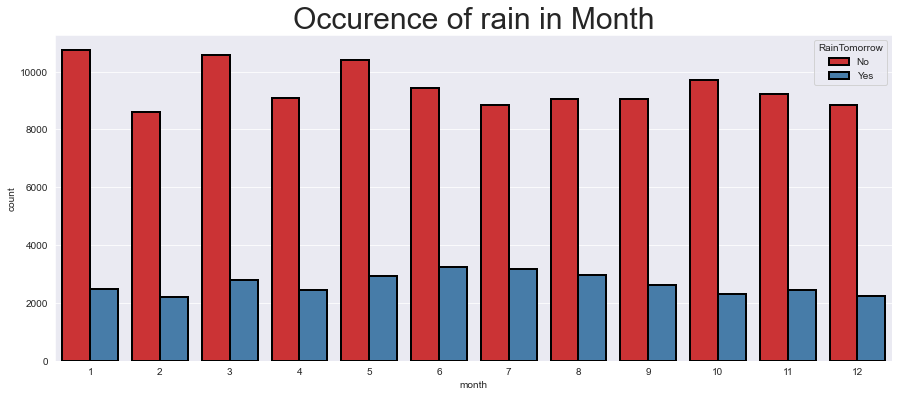

In [11]:
#bar chart 

sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'month', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title("Occurence of rain in Month",size = 30 )
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa terjadinya hujan di tiap bulan umumnya tidak hujan di hari berikutnya.

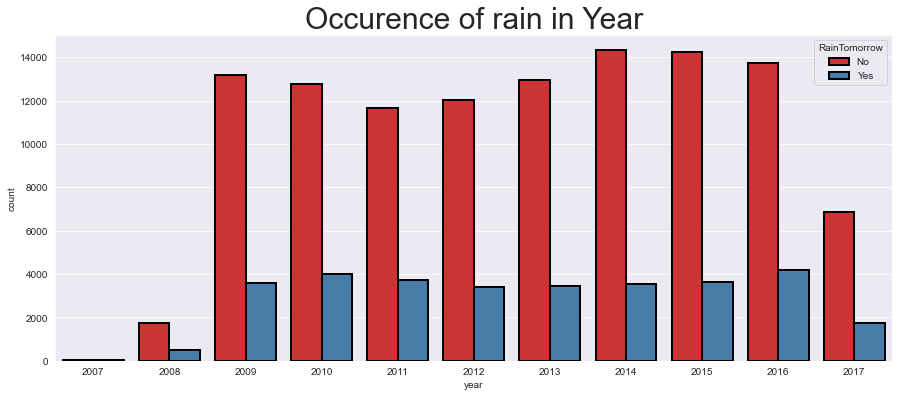

In [12]:
#bar chart 

sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'year', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title("Occurence of rain in Year",size = 30 )
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa terjadinya hujan di tiap tahun umumnya tidak hujan di hari berikutnya.

## Displot

bagian ini berisikan visualisasi menggunakan displot

C:\Users\Isal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Displot')

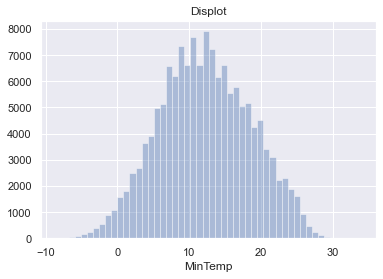

In [13]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False).set_title("Displot")

**interpretasi**

berdasarkan plot diatas, terlihat bahwa rata-rata suhu minimum di Australia berada diantara 20 dan 23 derajat.

## Scatter Plot

bagian ini berisikan visualisasi menggunakan displot

Text(0.5, 1.0, 'Scatter Plot')

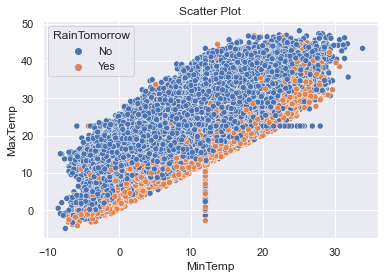

In [14]:
sns.scatterplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df).set_title("Scatter Plot")

**interpretasi**

berdasarkan plot diatas, terlihat bahwa korelasi antar variabel MaxTemp dan MinTemp ketika memiliki suhu tinggi, lebih umum tidak hujan di hari berikutnya.

Text(0.5, 1.0, 'Scatter Plot')

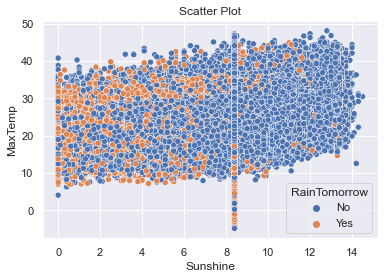

In [15]:
sns.scatterplot(x='Sunshine', y = 'MaxTemp', hue = "RainTomorrow", data = df).set_title("Scatter Plot")

**interpretasi:**

berdasarkan output diatas, terlihat bahwa korelasi variabel MaxTemp dan Sunshine ketika memiliki suhu tinggi di Sunshine, lebih umum tidak hujan di hari berikutnya.

# Pre-processing

bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [16]:
#encode data kategorik menjadi numerik

label_encoder = preprocessing.LabelEncoder()
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

setelah dilakukan encode data dari kategorik menjadi numerik, langkah selajutnya akan melihat kembali tabel datanya.

In [17]:
#melihat data

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


berdasarkan tabel diatas, dapat dilihat bahwa semua data sudah bertipe numerik. namun, untuk kolom date, year, month, dan day akan dihapus saja karena sudah tidak digunakan lagi.

In [18]:
#hapus kolom date

df.drop(columns=['Date', 'year', 'month', 'day'], axis=1, inplace=True)

setelah menghapus kolom date, selanjutnya kita akan cek korelasi variabel independen agar bisa mengetahui mana variabel yang saling berikatan dengan variabel lainnya yang bisa mempengaruhi prediksi.

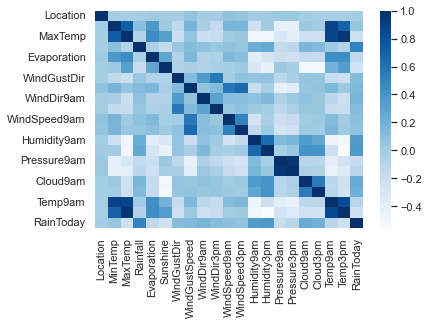

In [19]:
#cek korelasi antar variable independen

matriks_korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues');

setelah cek variabel independen, maka selanjutnya akan dibuat korelasi bar plot dan matriks korelasi.

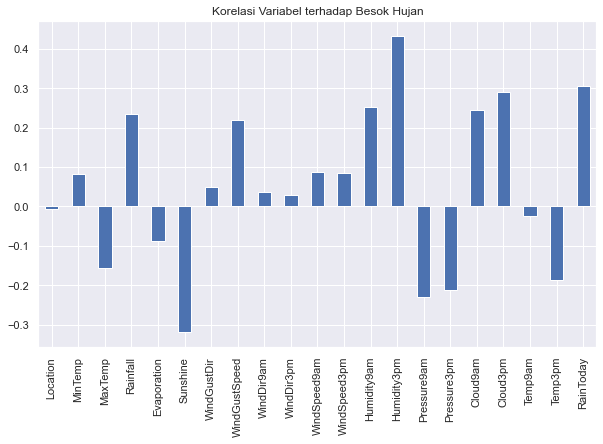

In [20]:
#membuat korelasi bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)

fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corrwith(df.RainTomorrow)
korelasi.plot.bar(title='Korelasi Variabel terhadap Besok Hujan');

berdasarkan plot diatas, maka akan menggunakan variabel yang memiliki korelasi positif karena memiliki pengaruh terhadap variabel target "RainTomorrow." selanjutnya, akan dibuat tabel baru yang berisikikan variabel-variabel berpengaruh terhadap variabel target "RainTomorrow."

In [21]:
#tabel terbaru

df_fix = df[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow']]
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


setelah membuat tabel baru, selanjutnya akan mendeklarasikan variabel X dan y. 

In [22]:
#deklarasi variabel fitur "X" dan variabel target "y"

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

setelah mendeklarasikan variabel X dan y, kita akan melakukan train/test split menjadi 80% training dan 20% testing.

In [23]:
#split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

kita telah mengimplementasikan train/test split menjadi 80% training dan 20% testing, selanjutnya akan masuk ke dalam model Logistic Regression dan SVM.

# Logistic Regression

## Define Model

bagian ini berisi cell untuk mendeﬁnisikan model.

In [24]:
#menentukan model klasifikasi
model = LogisticRegression()

#training model
model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

C:\Users\Isal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


berdasarkan output diatas, dapat dilihat bahwa model klasifikasi yang akan digunakan adalah logistic regression. selanjutnya, akan dilakukan pelatihan model.

# Model Training

cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [25]:
#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

#membuat hasil prediksi raintomorrow
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['Predicted_RainTomorrow'] = y_pred
df_test.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predicted_RainTomorrow
100721,22,15.0,18.9,4.2,6.6,8.0,6,54.0,6,7,24.0,31.0,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,1,0
30234,37,13.1,26.8,0.0,4.6,10.9,13,39.0,13,14,22.0,15.0,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,0,0
68427,18,19.0,29.0,0.0,11.0,5.6,3,59.0,3,3,39.0,22.0,50.0,38.0,1006.5,1003.4,5.0,5.0,24.2,27.2,0,0
28624,34,18.1,32.2,0.0,2.1,8.4,4,30.0,3,4,0.0,17.0,99.0,51.0,1019.2,1014.6,5.0,5.0,20.9,31.6,0,0
31173,37,13.9,19.6,14.0,1.2,5.4,11,50.0,12,8,17.0,22.0,90.0,64.0,1017.6,1018.4,7.0,6.0,15.5,19.1,1,1
573,2,0.6,11.9,0.2,4.8,8.4,13,22.0,12,7,2.0,11.0,99.0,54.0,1024.3,1021.8,1.0,2.0,2.8,11.5,0,0
120056,32,21.8,36.2,0.0,12.2,11.9,0,61.0,5,7,31.0,30.0,14.0,12.0,1014.9,1013.2,6.0,0.0,31.2,33.4,0,0
43057,47,17.7,22.3,0.0,4.8,8.4,10,54.0,3,8,13.0,37.0,70.0,80.0,1012.8,1014.3,5.0,7.0,16.7,17.0,0,1
28966,34,18.4,25.7,2.6,1.2,8.4,4,24.0,3,5,0.0,2.0,100.0,64.0,1026.5,1023.3,5.0,5.0,19.8,24.2,1,0
90691,14,22.0,27.9,16.6,4.8,8.4,10,61.0,10,8,31.0,30.0,77.0,78.0,1021.4,1020.9,5.0,5.0,25.3,23.8,1,1


berdasarkan tabel diatas, dapat dilihat bahwa sudah ada hasil prediksi keesokan hari hujan dari implementasi model logistic regression. selanjutnya, akan mengevaluasi model untuk melihat nilai akurasi dan MSE dari model logistic regression.

# Model Evaluasi

pada bagian ini, dilakukan model evaluasi yang harus menunjukkan bagaimana performa model. hal ini dibuktikan dengan melihat nilai akurasi dan tingkat kesalahan model (MSE). 

In [27]:
#melihat nilai akurasi dan MSE

print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Accuracy Score: 0.8388904166093771
Mean Squared Error: 0.16110958339062284


**interpretasi**

berdasarkan output diatas, terlihat bahwa model logistic regression memiliki nilai akurasi yang tinggi sebesar 0.8388904166093771 atau sekitar 83.88% dengan nilai MSE sebesar 0.16110958339062284.

# SVM

## Define Model

bagian ini berisi cell untuk mendeﬁnisikan model.

In [28]:
#menentukan model klasifikasi
model_svm = svm.SVC()

#training model
model_svm.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred1 = model_svm.predict(X_test) 

berdasarkan output diatas, dapat dilihat bahwa model klasifikasi yang akan digunakan adalah SVM. selanjutnya, akan dilakukan pelatihan model.

## Model Training

cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [29]:
#prediksi respon untuk dataset test
y_pred1 = model_svm.predict(X_test)

#membuat hasil prediksi raintomorrow
test1 = X_test.copy()
df_test1 = pd.DataFrame(test1)
df_test1['Predicted_RainTomorrow'] = y_pred1
df_test1.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predicted_RainTomorrow
100721,22,15.0,18.9,4.2,6.6,8.0,6,54.0,6,7,24.0,31.0,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,1,0
30234,37,13.1,26.8,0.0,4.6,10.9,13,39.0,13,14,22.0,15.0,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,0,0
68427,18,19.0,29.0,0.0,11.0,5.6,3,59.0,3,3,39.0,22.0,50.0,38.0,1006.5,1003.4,5.0,5.0,24.2,27.2,0,0
28624,34,18.1,32.2,0.0,2.1,8.4,4,30.0,3,4,0.0,17.0,99.0,51.0,1019.2,1014.6,5.0,5.0,20.9,31.6,0,0
31173,37,13.9,19.6,14.0,1.2,5.4,11,50.0,12,8,17.0,22.0,90.0,64.0,1017.6,1018.4,7.0,6.0,15.5,19.1,1,0
573,2,0.6,11.9,0.2,4.8,8.4,13,22.0,12,7,2.0,11.0,99.0,54.0,1024.3,1021.8,1.0,2.0,2.8,11.5,0,0
120056,32,21.8,36.2,0.0,12.2,11.9,0,61.0,5,7,31.0,30.0,14.0,12.0,1014.9,1013.2,6.0,0.0,31.2,33.4,0,0
43057,47,17.7,22.3,0.0,4.8,8.4,10,54.0,3,8,13.0,37.0,70.0,80.0,1012.8,1014.3,5.0,7.0,16.7,17.0,0,0
28966,34,18.4,25.7,2.6,1.2,8.4,4,24.0,3,5,0.0,2.0,100.0,64.0,1026.5,1023.3,5.0,5.0,19.8,24.2,1,0
90691,14,22.0,27.9,16.6,4.8,8.4,10,61.0,10,8,31.0,30.0,77.0,78.0,1021.4,1020.9,5.0,5.0,25.3,23.8,1,1


berdasarkan tabel diatas, dapat dilihat bahwa sudah ada hasil prediksi keesokan hari hujan dari implementasi model SVM. selanjutnya, akan mengevaluasi model untuk melihat nilai akurasi dan MSE dari model SVM.

## Model Evaluasi

pada bagian ini, dilakukan model evaluasi yang harus menunjukkan bagaimana performa model. hal ini dibuktikan dengan melihat nilai akurasi dan tingkat kesalahan model (MSE). 

In [30]:
#melihat nilai akurasi dan MSE

print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred1))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred1))

Accuracy Score: 0.8339749759384023
Mean Squared Error: 0.1660250240615977


**interpretasi**

berdasarkan output diatas, terlihat bahwa model SVM memiliki nilai akurasi yang tinggi sebesar 0.8339749759384023 atau sekitar 83.39% dengan nilai MSE sebesar 0.1660250240615977.

# Pickle

In [38]:
#simpan model training sbg file pickle
save_model = pickle.dumps(model)

#load pickle model
model_from_pickle = pickle.loads(save_model)

#gunakan load pickle model utk membuat prediksi
model_from_pickle.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#simpan model sbg file pickle
joblib.dump(model, 'rain_pred_model.pkl')

#load model dari file
model_from_joblib = joblib.load('rain_pred_model.pkl')

#gunakan load model utk membuat prediksi
model_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

# Model Inference

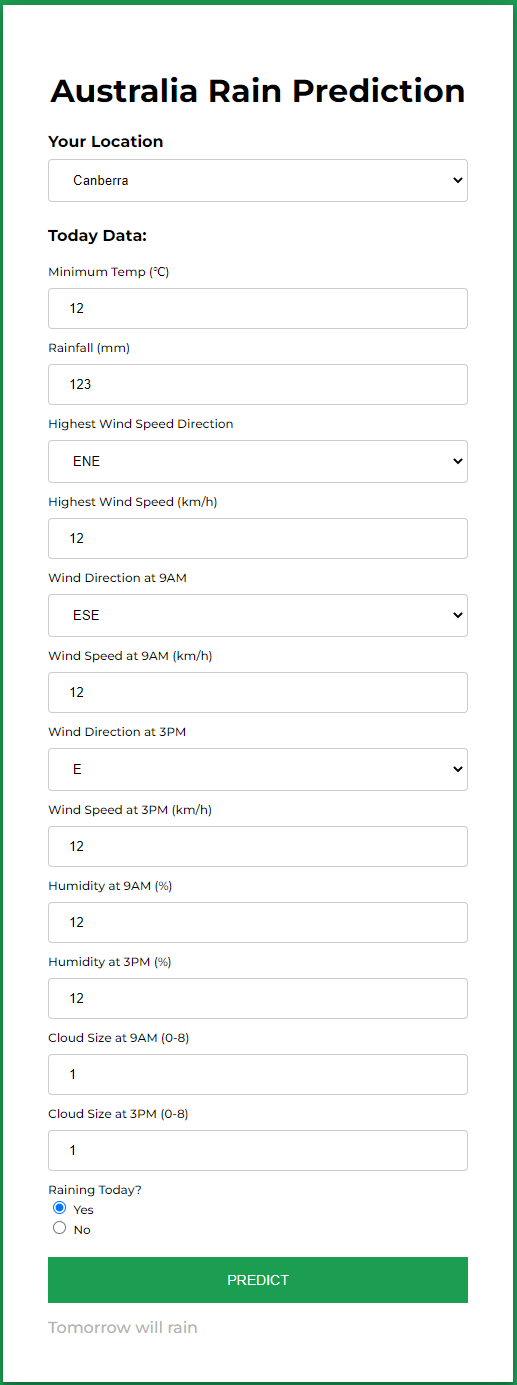

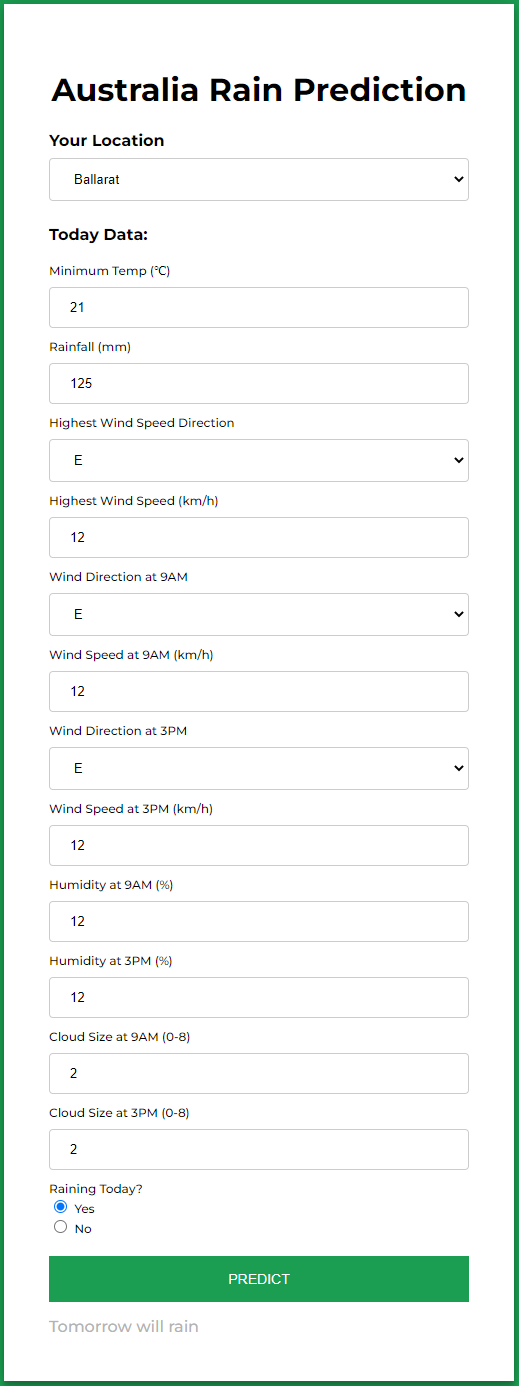

# Kesimpulan

Jadi, dapat disimpulkan bahwa:
1. Dari kedua model tersebut didapatkan akurasi tertinggi ada pada model Logistic Regression sebesar 0.8388904166093771 atau sekitar 83.88% dengan nilai MSE yaitu 0.16110958339062284. sehinggga, model Logistic Regression cukup akurat dalam menebak besok hujan (target = 1).
2. Fitur-fitur yang digunakan untuk membuat model sudah tepat sasaran.